In [76]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import time

import tensorflow as tf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Import Data

In [2]:
total_features = ['Page Likes', 'Page Checkins', 'Page Talking About', 'Page Category', 
            'Min CC1', 'Max CC1', 'Average CC1', 'Median CC1', 'Standard Deviation CC1', 
            'Min CC2', 'Max CC2', 'Average CC2', 'Median CC2', 'Standard Deviation CC2', 
            'Min CC3', 'Max CC3', 'Average CC3', 'Median CC3', 'Standard Deviation CC3', 
            'Min CC4', 'Max CC4', 'Average CC4', 'Median CC4', 'Standard Deviation CC4', 
            'Min CC5', 'Max CC5', 'Average CC5', 'Median CC5', 'Standard Deviation CC5', 
            'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 
            'Base Time', 'Post Length', 'Post Share Count', 'Post Promotion Status', 'H Local', 
            'Sunday_Wk1', 'Monday_WK1', 'Tuesday_WK1', 'Wednesday_WK1', 'Thursday_WK1', 'Friday_WK1', 'Saturday_WK1', 
            'Sunday_WK2', 'Monday_WK2', 'Tuesday_WK2', 'Wednesday_WK2', 'Thursday_WK2', 'Friday_WK2', 'Saturday_WK2',
            'Number of Comments in the Next H Hours']

# Import 5 data sets (training and test)
train_data_1 = pd.read_csv("Dataset/Training/Features_Variant_1.csv", names = total_features)
test_data_1 = pd.read_csv("Dataset/Testing/TestSet/Test_Case_1.csv", names = total_features)

train_data_2 = pd.read_csv("Dataset/Training/Features_Variant_2.csv", names = total_features)
test_data_2 = pd.read_csv("Dataset/Testing/TestSet/Test_Case_2.csv", names = total_features)

train_data_3 = pd.read_csv("Dataset/Training/Features_Variant_3.csv", names = total_features)
test_data_3 = pd.read_csv("Dataset/Testing/TestSet/Test_Case_3.csv", names = total_features)

train_data_4 = pd.read_csv("Dataset/Training/Features_Variant_4.csv", names = total_features)
test_data_4 = pd.read_csv("Dataset/Testing/TestSet/Test_Case_4.csv", names = total_features)

train_data_5 = pd.read_csv("Dataset/Training/Features_Variant_5.csv", names = total_features)
test_data_5 = pd.read_csv("Dataset/Testing/TestSet/Test_Case_5.csv", names = total_features)

### Create features (numeric/catagorical/label)

In [26]:
# All binary encoded as catagorical features
cat_attribs = total_features[39:-1]
cat_attribs.insert(0, total_features[37])

# anything else as numeric features
num_attribs = total_features[:-17]
num_attribs.append(total_features[38])

# target feature (Number of Comments in the Next H Hours) last column
target_feature = total_features[-1:]

### Create Pipeline

In [33]:
# Create full-pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])

### Fit and Transform with Pipeline

In [34]:
# Run  pipeline on training and test sets. transform the training data and test data's features and label

# Dataset 1
training_data_1_features = full_pipeline.fit_transform(train_data_1.drop(target_feature[0], axis=1))
training_data_1_target = train_data_1[target_feature[0]].copy()
test_data_1_features = full_pipeline.transform(test_data_1.drop(target_feature[0], axis=1))
test_data_1_target = test_data_1[target_feature[0]].copy()

# Dataset 2
training_data_2_features = full_pipeline.fit_transform(train_data_2.drop(target_feature[0], axis=1))
training_data_2_target = train_data_2[target_feature[0]].copy()
test_data_2_features = full_pipeline.transform(test_data_2.drop(target_feature[0], axis=1))
test_data_2_target = test_data_2[target_feature[0]].copy()

# Dataset 3
training_data_3_features = full_pipeline.fit_transform(train_data_3.drop(target_feature[0], axis=1))
training_data_3_target = train_data_3[target_feature[0]].copy()
test_data_3_features = full_pipeline.transform(test_data_3.drop(target_feature[0], axis=1))
test_data_3_target = test_data_3[target_feature[0]].copy()

# Dataset 4
training_data_4_features = full_pipeline.fit_transform(train_data_4.drop(target_feature[0], axis=1))
training_data_4_target = train_data_4[target_feature[0]].copy()
test_data_4_features = full_pipeline.transform(test_data_4.drop(target_feature[0], axis=1))
test_data_4_target = test_data_4[target_feature[0]].copy()

# Dataset 5
training_data_5_features = full_pipeline.fit_transform(train_data_5.drop(target_feature[0], axis=1))
training_data_5_target = train_data_5[target_feature[0]].copy()                                             
test_data_5_features = full_pipeline.transform(test_data_5.drop(target_feature[0], axis=1))
test_data_5_target = test_data_5[target_feature[0]].copy()                                                       

### Create data dictionary

In [38]:
data = dict([(1, [training_data_1_features, \
               np.array(training_data_1_target), \
               test_data_1_features, \
               np.array(test_data_1_target)]),
         (2, [training_data_2_features, \
               np.array(training_data_2_target), \
               test_data_2_features, \
               np.array(test_data_2_target)]),
         (3, [training_data_3_features, \
               np.array(training_data_3_target), \
               test_data_3_features, \
               np.array(test_data_3_target)]),
         (4, [training_data_4_features, \
               np.array(training_data_4_target), \
               test_data_4_features, \
               np.array(test_data_4_target)]),
         (5, [training_data_5_features, \
               np.array(training_data_5_target), \
               test_data_5_features, \
               np.array(test_data_5_target)])    
         ])

# Random Forest Regressor

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()

param = {'n_estimators' : [10, 50, 100], 'max_features' : [0.1, 0.5], 'max_depth': [2, 5, 7],
         'min_samples_split' : [0.1, 0.5], 'min_samples_leaf' :  [0.1, 0.5],
         'max_leaf_nodes' : [2, 7, 10]}

random_search_regressor_forest = RandomizedSearchCV(random_forest_regressor, param, cv = 4, scoring='neg_mean_absolute_error', 
                                  refit = True, n_jobs = -1, verbose = 2)

### Create functions to make moduler

In [137]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, accuracy_score

def get_fit_model(X, y):
    model = random_search_regressor_forest.fit(X, y)
    #print_best(model)
    return model

def print_best(model):
    print(model.best_params_)
    print(model.best_estimator_)
    
def predict_model(model, X, label):
    starttime = time.time()
    predicted_y = model.predict(X)
    endtime = time.time()
    
    #print("Processing time for", label, "model took {:.1f}s.".format(endtime - starttime))
    return predicted_y, round(endtime - starttime, 4)

def get_true_hits(actual_y, predicted_y, label):
    model_index = np.array([i for i in range(len(actual_y))])
    top10_index_predicted = pd.DataFrame(data = {'Indexes' : model_index, 'Predicted_Values' : predicted_y}).sort_values(by=['Predicted_Values'])['Indexes'][0:10,]
    top10_index_actuals = pd.DataFrame(data = {'Indexes' : model_index, 'Actual_Values' : actual_y}).sort_values(by=['Actual_Values'])['Indexes'][0:10,]
    truehits = np.intersect1d(top10_index_predicted,top10_index_actuals).shape[0]
    
    #print("True Hits for", label, ": ", truehits)
    return truehits

def get_roc_auc_score(actual_y, predicted_y, label):
    top10_predicted = np.sort(predicted_y)[-10:]
    top10_actuals = np.sort(actual_y)[-10:]

    predictions_binary = (predicted_y >= top10_predicted[0])
    predictions_binary = predictions_binary * 1

    actuals_binary = (actual_y >= top10_actuals[0])
    actuals_binary = actuals_binary * 1

    score = roc_auc_score(actuals_binary, predictions_binary)
    #print("ROC / AUC Score for", label, ": ", score)
    return score

def get_mean_absolute_error(actual_y, predicted_y, label):
    error =  mean_absolute_error(actual_y, predicted_y)
    #print("Mean Absolute Error for", label, ": ", error)
    
    return error

def get_accuracy_score(actual_y, predicted_y):
    return accuracy_score(actual_y, predicted_y)

def predict_result(model, X, y, label, result_to_test=False):
    predicted_y, cal_time = predict_model(model.best_estimator_, X, label)
    
    true_hit = get_true_hits(y, predicted_y, label)
    cal_roc_auc_score = get_roc_auc_score(y, predicted_y, label)
    cal_mean_absolute_error = get_mean_absolute_error(y, predicted_y, label)

    if (result_to_test):
        list_of_hits_test_rf.append(true_hit)
        list_of_auc_test_rf.append(cal_roc_auc_score)
        list_of_mae_test_rf.append(cal_mean_absolute_error)
        list_of_eval_time_test_rf.append(cal_time)
    else :
        list_of_hits_variant_rf.append(true_hit)
        list_of_auc_variant_rf.append(cal_roc_auc_score)
        list_of_mae_variant_rf.append(cal_mean_absolute_error)
        list_of_eval_time_variant_rf.append(cal_time)
            
def plot_chart(axes, data, xcols, xlabel, ylabel, title):
    plt.subplot(axes)
    y_hits = data
    x_hits = xcols
    plt.xticks(rotation = 'vertical')
    sns.barplot(x=x_hits, y=y_hits)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

def create_result_rf(list_of_hits, list_of_auc, list_of_mae, list_of_eval_time, istest=False):
    columns=['Variant 1', 'Variant 2', 'Variant 3', 'Variant 4', 'Variant 5']
    if (istest):
        columns=['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4', 'Test Case 5']
        
    return pd.DataFrame([list_of_hits, list_of_auc, list_of_mae, list_of_eval_time],
                      index=['True Hits', 'AUC', 'MAE', 'Time'],
                      columns=columns)

def plot_random_forest():
    plt.figure(figsize=(25, 5))

    x_cols = ['True Hits 1' ,'True Hits 2' ,'True Hits 3' ,'True Hits 4','True Hits 5']
    plot_chart(141, list_of_hits_test_rf, x_cols, 'Test Sets', 'True Hits', 'Bar Plot of Hits for 5 Test Sets')

    x_cols = ['ROC Model 1','ROC Model 2','ROC Model 3','ROC Model 4','ROC Model 5']
    plot_chart(142, list_of_auc_test_rf, x_cols, 'Test Sets', 'AUC Score', 'Bar Plot of AUC for 5 Test Sets')


    x_cols = ['MAE Model 1','MAE Model 2','MAE Model 3','MAE Model 4','MAE Model 5']
    plot_chart(143, list_of_mae_test_rf, x_cols, 'Test Sets', 'MAE Error', 'Bar Plot of MAE for 5 Test Sets')


    x_cols = ['Time Model 1','Time Model 2','Time Model 3','Time Model 4','Time Model 5']
    plot_chart(144, list_of_eval_time_test_rf, x_cols, 'Test Sets', 'Time', 'Bar Plot of Evaluation Time for 5 Test Sets')

In [58]:
# Declare result summary lists
list_of_hits_variant_rf = []
list_of_auc_variant_rf = []
list_of_mae_variant_rf = []
list_of_eval_time_variant_rf = []

list_of_hits_test_rf = []
list_of_auc_test_rf = []
list_of_mae_test_rf = []
list_of_eval_time_test_rf = []

In [59]:
# train all models 
start = time.time()
for i, d in data.items():
    
    print('Train model on dataset', i)
    model = get_fit_model(d[0], d[1])

    print('Predict result for training set')
    predict_result(model, d[0], d[1], '')  
    
    print('Predict result for test set')
    predict_result(model, d[2], d[3], '', True)
end = time.time()
print('Train all models. Process finished!')
print("Total processing time to predict result for all data through Random Forest Regressor took {:.1f}s.".format(end - start))

Train model on dataset 1
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.6s finished


Predict result for training set
Processing time for  model took 0.1s.
Predict result for test set
Processing time for  model took 0.0s.
Train model on dataset 2
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.1s finished


Predict result for training set
Processing time for  model took 0.2s.
Predict result for test set
Processing time for  model took 0.0s.
Train model on dataset 3
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.9s finished


Predict result for training set
Processing time for  model took 0.2s.
Predict result for test set
Processing time for  model took 0.0s.
Train model on dataset 4
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   27.4s finished


Predict result for training set
Processing time for  model took 0.3s.
Predict result for test set
Processing time for  model took 0.0s.
Train model on dataset 5
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   41.9s finished


Predict result for training set
Processing time for  model took 0.2s.
Predict result for test set
Processing time for  model took 0.0s.
Trained all models. Process finished!
Total processing time to predict result for all data through Random Forest Regressor took 141.7s.


### Random Forest Result Summary

- Test Models Result

In [62]:
create_result_rf(list_of_hits_test_rf, list_of_auc_test_rf, list_of_mae_test_rf, list_of_eval_time_test_rf, True)

,Test Case 1,Test Case 2,Test Case 3,Test Case 4,Test Case 5
True Hits,3.000000,2.000000,2.000000,4.000000,3.000000
AUC,0.816667,0.711111,0.611111,0.666667,0.550000
MAE,32.278557,25.135286,16.630174,36.515024,24.028726
Time,0.003800,0.004000,0.004400,0.004100,0.002600


- Training Models Result

In [63]:
create_result_rf(list_of_hits_variant_rf, list_of_auc_variant_rf, list_of_mae_variant_rf, list_of_eval_time_variant_rf)

,Variant 1,Variant 2,Variant 3,Variant 4,Variant 5
True Hits,0.000000,0.000000,0.000000,1.000000,1.000000
AUC,0.787945,0.790431,0.634221,0.644461,0.682939
MAE,8.008491,7.923967,8.594398,7.860961,7.797250
Time,0.060100,0.177200,0.170500,0.292500,0.167200



# Deep Neural Networks

- Initialization: He Initialization
- Activation Function: SELU
- Normalization: Batch Normalization
- Regularization: Dropout
- Optimizer: Adam
- Learning Rate Schedule: None

In [64]:
# Reset graph function
def reset_graph(seed=123):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [65]:
# define the directory to write the TensorBoard logs to:
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

logdir = log_dir("TensorLogs")

### Tensorflow Construction Phase

In [140]:
# Build a DNN with 2 hidden layers, He initialization, and the RELU activation function.
reset_graph()

n_inputs = training_data_1_features.shape[1]
n_hidden1 = 2
n_hidden2 = 2
n_outputs = 1

learning_rate = 0.0001

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None), name="y")

# Implement dropout
training = tf.placeholder_with_default(False, shape=(), name='training')
dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logit = tf.layers.dense(hidden2, n_outputs, name="outputs")   
    logits = logit[:, 0]
    
with tf.name_scope("loss"):
    mse = tf.losses.mean_squared_error(labels=y, predictions=logits)
    loss = tf.reduce_mean(mse, name="loss")
    loss_summary = tf.summary.scalar('loss', loss)
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    
    # MAE
    mae = tf.reduce_mean(tf.abs(y-logits))
    mae_summary = tf.summary.scalar('mae', mae) # MAE DONE
    
    # Hits
    # First, get top 10 values for labels and logits; this will be used for Hits and AUC
    top_10_labels_vals, top_10_labels_index = tf.nn.top_k(y, 10)
    top_10_logits_vals, top_10_logits_index = tf.nn.top_k(logits, 10)
    
    # Next, find the intersection of indexes for the top 10 values and use this for Hits
    hits = tf.sets.set_intersection(top_10_labels_index, top_10_logits_index[None])
    hits_10 = tf.size(hits)
    hits_summary = tf.summary.scalar('hits_10', hits_10)
    
    #AUC
    label_bool = tf.greater_equal(y, tf.reduce_min(top_10_labels_vals))
    label = tf.cast(label_bool, tf.int32)
    
    predictions_bool = tf.greater_equal(logits, tf.reduce_min(top_10_logits_vals))
    prediction = tf.cast(predictions_bool, tf.int32)
 
    _,auc = tf.metrics.auc(label, prediction)
    
    #Accuracy
    _,accuracy = tf.metrics.accuracy(label, prediction)
    
saver = tf.train.Saver(max_to_keep=100000)

### Helper functions and Train DNN

In [141]:
# declare files variables
tmp_path = 'tmp/'
checkpoint_file = '_train_dnn_reg_model.ckpt'
model_path = 'models/'
model_file = '_train_dnn_reg_model'

# Helper functions
def build_path(num):
    checkpoint_path = tmp_path + str(num) + checkpoint_file
    checkpoint_epoch_path = checkpoint_path + ".epoch"
    final_model_path = model_path + str(num) + model_file
    return checkpoint_path, checkpoint_epoch_path, final_model_path

# random batch function
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

# delete files utility functions
def delete_file(file):
    with tf.Session() as sess:
        if os.path.isfile(file):
            os.remove(file)

def delete_files():
    for i in data:
        _,checkpoint_epoch_path,_ = build_path(i)
        delete_file(checkpoint_epoch_path)
        
# create the FileWriter that we will use to write the TensorBoard logs:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
            
# Traing dnn
def train_dnn(X_train, y_train, X_test, y_test, num): 
    # local variables
    n_epochs = 50
    batch_size = 25
    n_batches = int(np.ceil(X_train.shape[0] / batch_size))
    start_epoch = 0

    # setting up path
    checkpoint_path, checkpoint_epoch_path, final_model_path = build_path(num)
    starttime = time.time()

    # start session
    with tf.Session() as sess:
        if os.path.isfile(checkpoint_epoch_path):
            # if the checkpoint file exists, restore the model and load the epoch number
            with open(checkpoint_epoch_path, "rb") as f:
                start_epoch = int(f.read())
            print("Training was interrupted. Continuing at epoch", start_epoch)
            saver.restore(sess, checkpoint_path)
        else:
            start_epoch = 0
            sess.run(tf.global_variables_initializer())
            sess.run(tf.local_variables_initializer())
            for epoch in range(start_epoch, n_epochs):
                for iteration in range(int(np.ceil(len(X_train) // batch_size))):
                    X_batch, y_batch = random_batch(X_train, y_train, batch_size)
                    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})          

                loss_val, summary_str = sess.run([loss, loss_summary], feed_dict = {X : X_test, y : y_test})
                file_writer.add_summary(summary_str, epoch)
                if epoch % 2 == 0:
                    #print("Epoch:", epoch, "\tLoss:", loss_val)
                    saver.save(sess, checkpoint_path)
                    with open(checkpoint_epoch_path, "wb") as f:
                        f.write(b"%d" % (epoch + 1))

        saver.save(sess, final_model_path)
        print("Saving file: ", final_model_path)
        print("Train model completed.")
    endtime = time.time()
    return starttime, endtime

def create_result_mls(list_of_hits, list_of_auc, list_of_mae, list_of_accuracy, list_of_eval_time, istest=False):
    columns=['Variant 1', 'Variant 2', 'Variant 3', 'Variant 4', 'Variant 5']
    if (istest):
        columns=['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4', 'Test Case 5']
        
    return pd.DataFrame([list_of_hits, list_of_auc, list_of_mae, list_of_accuracy, list_of_eval_time],
                      index=['True Hits', 'AUC', 'MAE', 'Accuracy', 'Time'],
                      columns=columns)

def plot_dnn_result():
    plt.figure(figsize=(25, 5))

    x_cols = ['True Hits 1' ,'True Hits 2' ,'True Hits 3' ,'True Hits 4','True Hits 5']
    plot_chart(141, list_of_hits_test_mpl, x_cols, 'Test Sets', 'True Hits', 'Bar Plot of Hits for 5 Test Sets')

    x_cols = ['ROC Model 1','ROC Model 2','ROC Model 3','ROC Model 4','ROC Model 5']
    plot_chart(142, list_of_auc_test_mpl, x_cols, 'Test Sets', 'AUC Score', 'Bar Plot of AUC for 5 Test Sets')


    x_cols = ['MAE Model 1','MAE Model 2','MAE Model 3','MAE Model 4','MAE Model 5']
    plot_chart(143, list_of_mae_test_mpl, x_cols, 'Test Sets', 'MAE Error', 'Bar Plot of MAE for 5 Test Sets')


    x_cols = ['Time Model 1','Time Model 2','Time Model 3','Time Model 4','Time Model 5']
    plot_chart(144, list_of_eval_time_test_mpl, x_cols, 'Test Sets', 'Time', 'Bar Plot of Evaluation Time for 5 Test Sets')

In [68]:
# Declare result summary lists
list_of_hits_test_mpl = []
list_of_auc_test_mpl = []
list_of_mae_test_mpl = []
list_of_eval_time_test_mpl = []
list_of_accuracy_test_mpl = []

In [69]:
# delete epoch files to make process refresh again, make commit following line to get result from old files.
delete_files()

### Tensorflow Execution Phase

In [70]:
start = time.time()
# train all models 
for i, d in data.items():
    print('Train DNN for dataset', i)
    starttime, endtime = train_dnn(d[0], d[1], d[2], d[3], i)
    list_of_eval_time_test_mpl.append(round(endtime-starttime, 4))
end = time.time()
print('Train all models. Process finished!')
print("Total processing time to train for all data through Neural Networks took {:.1f}s.".format(end - start))

Train DNN for dataset 1
Saving file:  models/1_train_dnn_reg_model
Train model completed.
Train DNN for dataset 2
Saving file:  models/2_train_dnn_reg_model
Train model completed.
Train DNN for dataset 3
Saving file:  models/3_train_dnn_reg_model
Train model completed.
Train DNN for dataset 4
Saving file:  models/4_train_dnn_reg_model
Train model completed.
Train DNN for dataset 5
Saving file:  models/5_train_dnn_reg_model
Train model completed.
Train all models. Process finished!
Total processing time to predict result for all data through Neural Networks took 595.3s.


### Create Results from Saved Sessions

In [71]:
# process all metrices from saved models (top 10 predictions)
for i, d in data.items():
    _,_,final_model_path = build_path(1)
    with tf.Session() as sess:
        sess.run(tf.local_variables_initializer())
        saver.restore(sess, final_model_path)

        list_of_mae_test_mpl.append(mae.eval(feed_dict={X : d[2], y : d[3]}))
        list_of_hits_test_mpl.append(hits_10.eval(feed_dict={X : d[2], y : d[3][None]}))
        list_of_auc_test_mpl.append(auc.eval(feed_dict={X : d[2], y : d[3]})) 
        list_of_accuracy_test_mpl.append(accuracy.eval(feed_dict={X : d[2], y : d[3]}))

INFO:tensorflow:Restoring parameters from models/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from models/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from models/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from models/1_train_dnn_reg_model
INFO:tensorflow:Restoring parameters from models/1_train_dnn_reg_model


### RESULT COMPARISON

### Random Forest Test Result

In [118]:
create_result_rf(list_of_hits_test_rf, list_of_auc_test_rf, list_of_mae_test_rf, list_of_eval_time_test_rf, True)

,Test Case 1,Test Case 2,Test Case 3,Test Case 4,Test Case 5
True Hits,3.000000,2.000000,2.000000,4.000000,3.000000
AUC,0.816667,0.711111,0.611111,0.666667,0.550000
MAE,32.278557,25.135286,16.630174,36.515024,24.028726
Time,0.003800,0.004000,0.004400,0.004100,0.002600


### Deep Neural Networks Test Result

In [119]:
create_result_mls(list_of_hits_test_mpl, list_of_auc_test_mpl, list_of_mae_test_mpl, list_of_accuracy_test_mpl, list_of_eval_time_test_mpl, True)

,Test Case 1,Test Case 2,Test Case 3,Test Case 4,Test Case 5
True Hits,7.000000,6.000000,5.000000,5.000000,6.000000
AUC,0.833333,0.777778,0.722222,0.722222,0.777778
MAE,24.003374,17.698275,18.343298,29.808174,19.680195
Accuracy,0.940000,0.920000,0.900000,0.900000,0.920000
Time,40.968200,87.865700,113.638000,155.294600,197.488300


### Random Forest Result Plots

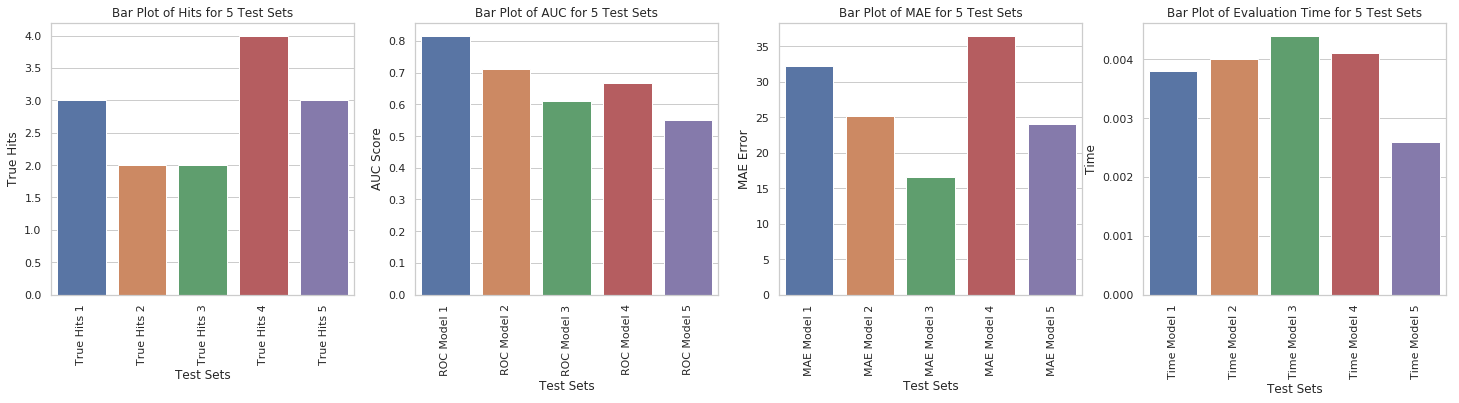

In [138]:
# Random forest result charts for test sets
plot_random_forest()

### Deep Neural Networks Result Plots

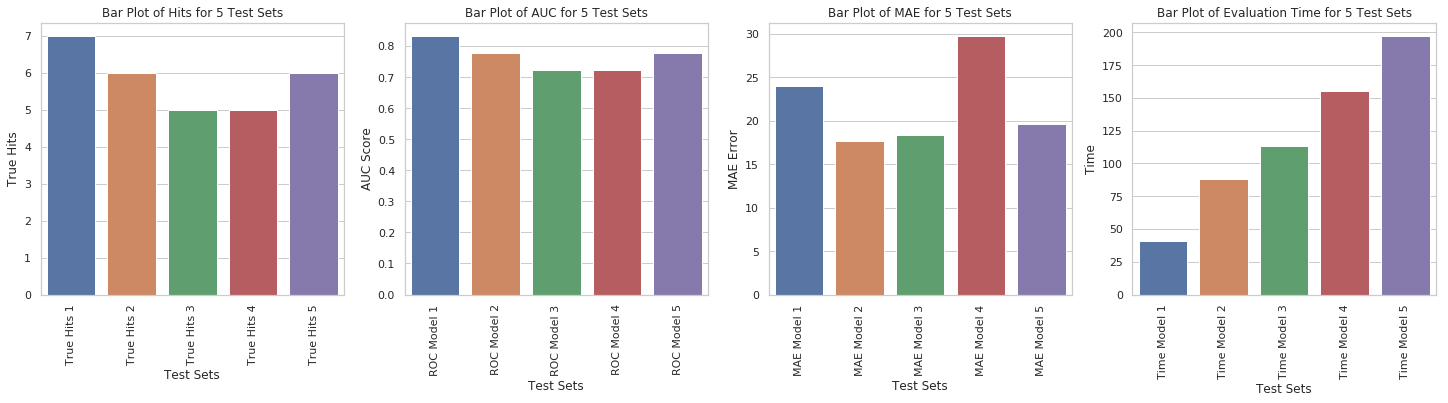

In [136]:
# Plots for Neural Networks
plot_dnn_result()

### SUMMARY

- Based on the Number of Hits, Nueral Networks performs better than Random Forest.
  <pre>
      - Random Forest   = [3, 2, 2, 4, 3]
      - Neural Networks = [7, 6, 5, 5, 6]
  </pre>
  
- The Area under the curve is better for the Neural Network for all 5 Models.
  <pre>
      - Random Forest    = [0.82, 0.71, 0.61, 0.68, 0.55]
      - Neural Networks  = [0.83, 0.78, 0.72, 0.72, 0.78]
  </pre>
    
- The Mean Absolute Error is better for the Neural Networks as well.
  <pre>
      - Random Forest    = [32.29, 25.14, 16.63, 36.52, 24.03]
      - Neural Networks  = [24.00, 17.70, 18.34, 29.81, 19.68]
  </pre>
  
- With the Number of Input and Hidden Layers, Processing Time increases for Neural Networks, when compared to Random Forest 
   <pre>
      - Random Forest    = [0.003, 0.004, 0.004, 0.004, 0.002]
      - Neural Networks  = [40.97, 87.87, 113.64, 155.29, 197.49]
  </pre>


### CONCLUSION

Based on the results above, Nueral Networks is a better model than Random Forest. Thus my findings doesn't supports the conclusions of the research paper.